In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

## Numpy

In [2]:
my_list = [1, 2, 3]
my_array = numpy.array(my_list)
print(my_array)
print(my_array.shape)

[1 2 3]
(3,)


In [3]:
my_list = [[1, 2, 3], [3, 4, 5]]
my_array = numpy.array(my_list)
print('First row is %s' % my_array[0])
print('Last row is %s' % my_array[-1])

First row is [1 2 3]
Last row is [3 4 5]


In [4]:
my_array1 = numpy.array([2, 2, 2])
my_array2 = numpy.array([3, 3, 3])
print('Addition is %s' % (my_array1 + my_array2))
print('Multiplication is %s' % (my_array1 * my_array2))

Addition is [5 5 5]
Multiplication is [6 6 6]


## MatplotLib

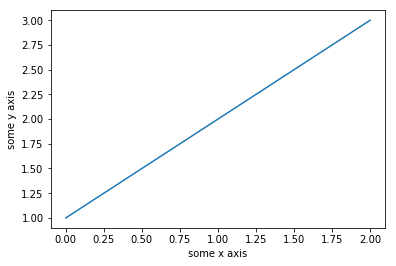

In [5]:
my_array = numpy.array([1, 2, 3])
plt.plot(my_array)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()

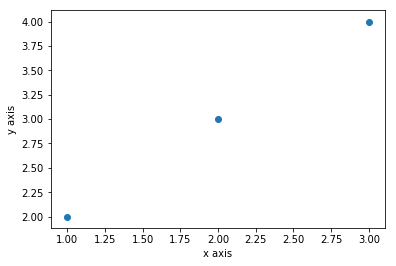

In [6]:
x = numpy.array([1, 2, 3])
y = numpy.array([2, 3, 4])
plt.scatter(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

## Series and DataFrame

### Series

Series are collections of values with labels:

In [7]:
my_array = numpy.array([1, 2, 3])
row_names = ['a', 'b', 'c']
series = pandas.Series(my_array, index=row_names)
print(series)

a    1
b    2
c    3
dtype: int64


In [8]:
print(series[0])

1


In [9]:
print(series['b'])

2


### DataFrame

A _DataFrame_ is a multidimentional array where the rows and the columns can be labeled.

In [10]:
my_array = numpy.array([[1, 2, 3], [4, 5, 6]])
row_names = ['a', 'b']
column_names = ['one', 'two', 'three']
data_frame = pandas.DataFrame(my_array, index=row_names, columns=column_names)
print(data_frame)

   one  two  three
a    1    2      3
b    4    5      6


In [11]:
print(data_frame['one'])

a    1
b    4
Name: one, dtype: int64


In [12]:
print(data_frame.one)

a    1
b    4
Name: one, dtype: int64


## Load CSV Data

**Using Python's standard library:**

In [13]:
import csv

filename = 'pima-indians-diabetes.csv'
raw_data = open(filename, 'r')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = numpy.array(x).astype('float')
print('Shape is %s' % str(data.shape))

Shape is (768, 9)


**Using Numpy**

In [14]:
from numpy import loadtxt

filename = 'pima-indians-diabetes.csv'
raw_data = open(filename, 'r')
data = loadtxt(raw_data, delimiter=",")
print('Shape is %s' % str(data.shape))

Shape is (768, 9)


**Using Pandas**

In [27]:
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = read_csv(filename, names=names)
print('Shape is %s' % str(data.shape))

Shape is (768, 9)


## Analysing Data

### Peeking

In [28]:
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['Pregn', 'Glucose', 'Pressure', 'Skin', 'Insulin', 'BMI', 'PedigFunc', 'Age', 'Outcome']
data = read_csv(filename, names=names)
peek = data.head(20)
print(peek)

    Pregn  Glucose  Pressure  Skin  Insulin   BMI  PedigFunc  Age  Outcome
0       6      148        72    35        0  33.6      0.627   50        1
1       1       85        66    29        0  26.6      0.351   31        0
2       8      183        64     0        0  23.3      0.672   32        1
3       1       89        66    23       94  28.1      0.167   21        0
4       0      137        40    35      168  43.1      2.288   33        1
5       5      116        74     0        0  25.6      0.201   30        0
6       3       78        50    32       88  31.0      0.248   26        1
7      10      115         0     0        0  35.3      0.134   29        0
8       2      197        70    45      543  30.5      0.158   53        1
9       8      125        96     0        0   0.0      0.232   54        1
10      4      110        92     0        0  37.6      0.191   30        0
11     10      168        74     0        0  38.0      0.537   34        1
12     10      139       

### Data Types

In [30]:
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


### Descriptive Statistics

In [33]:
from pandas import read_csv
from pandas import set_option

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('display.width', 100) # makes it more readable
set_option('precision', 3) # decimal precision
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


### Class Distribution

In [34]:
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


### Correlation of features

In [35]:
from pandas import read_csv
from pandas import set_option

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


### Skew of Univariate Distributions

In [37]:
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('precision', 6)
skew = data.skew()
print(skew)

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64


## Visualizing

### Histograms

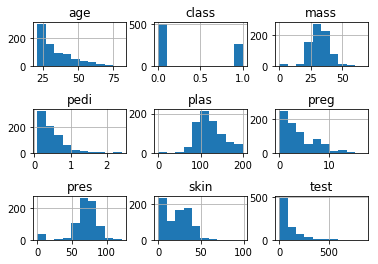

In [45]:
from matplotlib import pyplot
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.hist()
pyplot.subplots_adjust(hspace=1)
pyplot.show()

### Density plots

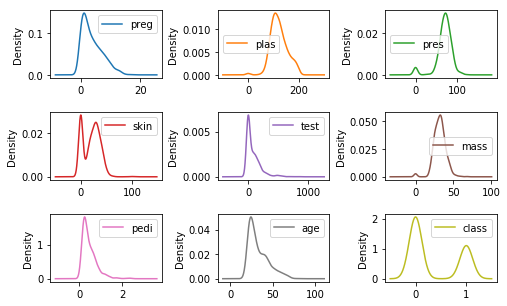

In [64]:
from matplotlib import pyplot
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(8, 5))
pyplot.subplots_adjust(wspace=0.5, hspace=0.5)
pyplot.show()

### Box and whisper plots

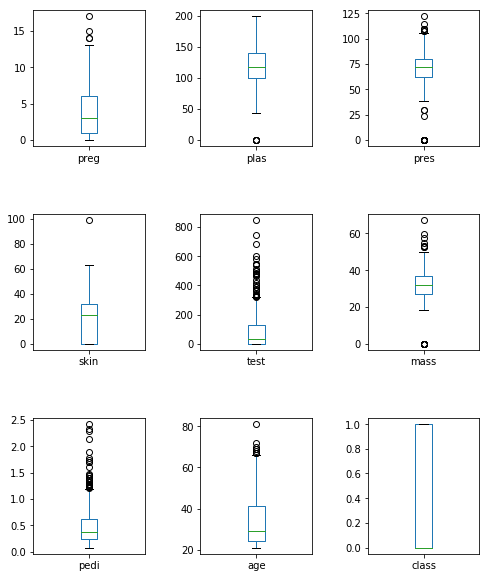

In [63]:
from matplotlib import pyplot
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8, 10))
pyplot.subplots_adjust(wspace=0.5, hspace=0.5)
pyplot.show()

### Correlation matrix plot

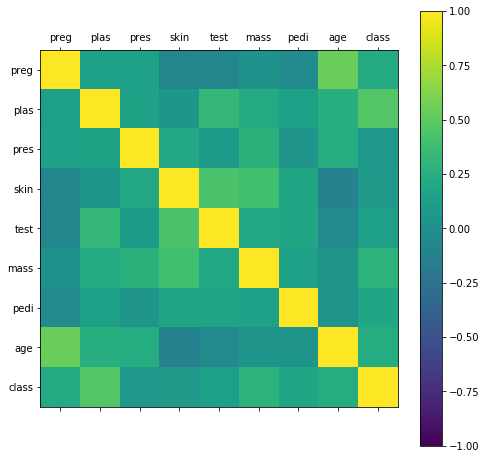

In [67]:
from matplotlib import pyplot
from pandas import read_csv

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()

fig = pyplot.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

## Pre-Processing Data

### Rescaling data

Also called normalization, make the input values in the same scale.

In [73]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separates the array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:]) # prints the 5 first rows

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


### Standardize data

Transforms the attributes with a Gaussian distribution to the mean 0 and standard deviation of 1.

In [74]:
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separates the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# standardize the values
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


### Normalize data

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (useful for algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors).

In [77]:
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Normalize data (length of 1)
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

set_printoptions(precision=3)

print('The rows are normalized to length 1:')
print(normalizedX[0:5,:])

The rows are normalized to length 1:
[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


### Binarize data

Make data binary according to a threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0.

In [78]:
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Binarization
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


## Feature Selection

### Univariate selection

In [82]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

# extracts the 4 most relevant features for the model
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=3)
print('Fit Scores: %s' % fit.scores_)
features = fit.transform(X)

print('Resuts: %s' % features[0:5,:])

Fit Scores: [ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
Resuts: [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


Here, the selected attributes were **plas**, **test**, **mass** and **age**.

### Recursive feature elemination

In [87]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of features selected: %d" % fit.n_features_)
print("Selected features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Number of features selected: 3
Selected features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


You can see that RFE chose the top 3 features as **preg**, **mass** and **pedi**. These are marked
`True` in the support array and marked with a choice 1 in the ranking array.

### Principal component analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique. A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result.

In [88]:
from pandas import read_csv
from sklearn.decomposition import PCA

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


### Feature importance using Random Forest and Extra Trees

Gives an score importance for each attribute.

In [90]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.119 0.229 0.1   0.078 0.075 0.155 0.123 0.122]


## Evaluating the performance of Machine Learning Algorithms

### Split in train and test sets

In [92]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7

# evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)

print("Accuracy: %.3f%%" % (result * 100.0))

Accuracy: 75.591%


Now reducing the number of features:

In [95]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7

# splits the train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# extracts the 4 most relevant features for the training model
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, Y_train)

# modifies the training dataset to include only the most relevant features
selected_features_train = fit.transform(X_train)
selected_features_test = fit.transform(X_test)

# creates the model based on the training set
model = LogisticRegression()
model.fit(selected_features_train, Y_train)

# tests the accuracy using the selected features on the 

result = model.score(selected_features_test, Y_test)

set_printoptions(precision=3)
print("Accuracy: %.3f%%" % (result * 100.0))

Accuracy: 76.378%


### K-fold cross validation

It works by splitting the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The algorithm is trained on k - 1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set. After running cross validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.

In [100]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
seed = 7

# evaluate using cross validation
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()

results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy mean: %.3f%%" % (results.mean()*100.0))
print("Accuracy standard deviation: %.3f%%" % (results.std()*100.0))

Accuracy mean: 76.951%
Accuracy standard deviation: 4.841%


### Leave one out cross validation

You can confgure cross validation so that the size of the fold is 1 (k is set to the number of observations in your dataset). The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data. A downside is that it can be a computationally more expensive procedure.

In [104]:
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
num_folds = 10

loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy mean: %.3f%%" % (results.mean()*100.0))
print("Accuracy standard deviation: %.3f%%" % (results.std()*100.0))

Accuracy mean: 76.823%
Accuracy standard deviation: 42.196%


### Repeated random test-train splits

Creates a random split of the data in train/test sets multiples times. You can repeat the process even more to improve accuracy as necessary. A downside is that it can include the same train/set splits in different runs, introducing redundancy.

This example splits the data into a 67%/33% train/test  split and repeats it 10 times:

In [106]:
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
n_splits = 10
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy mean: %.3f%%" % (results.mean()*100.0))
print("Accuracy standard deviation: %.3f%%" % (results.std()*100.0))

Accuracy mean: 76.496%
Accuracy standard deviation: 1.698%


### Summary

* k-fold cross validation is the _gold standard_ for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10;
* Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets;
* Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

**The best advice is to experiment and nd a technique for your problem that is fast and produces reasonable estimates.**

## Machine Learning Algorithms Performance Metrics

### Classification accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. **This is the most common evaluation metric for classification problems**. It is also the most misused.

In [110]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separates the array into input and output components
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()

# evaluates the accuracy of the model
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy mean: %.3f" % results.mean())
print("Accuracy standard deviation: %.3f" % results.std())

Accuracy mean: 0.770
Accuracy standard deviation: 0.048


### Logarithmic loss

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the measure is inverted to be ascending when using the `cross_val_score()` function..

In [109]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = 'pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separates the array into input and output components
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()

# evaluates the logarithmic loss of the model
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss mean: %.3f" % results.mean())
print("Logloss standard deviation: %.3f" % results.std())

Logloss mean: -0.493
Logloss standard deviation: 0.047
